This is the original functions from the knapsackWorksheet formatted correctly. Additions to the code follow in the cell right after this one.

In [142]:
def run_knapsack_ga(itemset, max_weight, max_time):
    import time
    import numpy as np
    
    start_time = time.time()
    best_so_far = None    
    while(time.time() - start_time < max_time-0.1):
        from numpy import mean, log
        from matplotlib import pyplot
        import random
        random.seed(100)
        items = itemset
        def get_genotype_value(genotype):
            return sum([items[i].value for i in genotype])
        def get_genotype_weight(genotype):
            return sum([items[i].weight for i in genotype])
        
        def point_mutation(genotype):
            random_genotype_index = random.randint(0, len(genotype)-1)
            current_weight = get_genotype_weight(genotype)
            checked = 0
            while(True):
                random_item_index = random.randint(0, num_items-1)
                weight_with_random = current_weight + items[random_item_index].weight - items[random_genotype_index].weight
                if random_item_index not in genotype and weight_with_random <= max_weight:
                    genotype[random_genotype_index] = random_item_index
                    return genotype
                if checked > num_items:
                    return genotype
                
        def mutate_genotype(genotype, prob_mut=0.5):
            mutated_genotype = genotype[:]
            if random.random() < prob_mut:
                point_mutation(mutated_genotype)
            return mutated_genotype
        
        def get_genotype_fitness(genotype):
            if get_genotype_weight(genotype) > max_weight or (get_genotype_weight(genotype)) == 0:
                return 0
            else:
                return get_genotype_value(genotype)/(get_genotype_weight(genotype)/max_weight)
            
        def get_best_from_population(pop):
            values = [get_genotype_value(gene) for gene in pop]
            return values.index(max(values))
        
        def random_individual():
            total_weight = 0

            #This is a list of the indexes from the item list
            #the individual has in its knapsack
            org_genotype = []

            while(total_weight < max_weight):
                random_item_index = random.randint(0, num_items-1)

                #Make sure this item isn't already in our knapsack.
                if random_item_index not in org_genotype:

                    #But if this item would break our knapsack, 
                    #lets just go ahead and call this organism done.
                    if total_weight + itemset[random_item_index].weight > max_weight:
                        return org_genotype

                    #Otherwise we can add this item and keep going!
                    else:
                        org_genotype.append(random_item_index)
                        total_weight += itemset[random_item_index].weight

            return org_genotype
        def knapsack(best_so_far, pop_size = 1000, num_generations = 1000, get_next_gen = "random"):
            pop_size = 1000
            num_generations = 1000

            population = [random_individual() for _ in range(pop_size)]
            pop_fitness = [get_genotype_fitness(g) for g in population]

            #keep track of mean fitness over time
            mean_fitnesses = [mean(pop_fitness)]

            #also keep track of the mean value of knapsacks overtime
            mean_value = mean([get_genotype_value(ind) for ind in population])
            mean_values = [mean_value]

            for generation in range(num_generations):
                pop_fitness = [get_genotype_fitness(g) for g in population]
                population = random.choices(population, k=pop_size, weights=pop_fitness)
                population = [mutate_genotype(g, prob_mut = 0.01) for g in population]

                #record new mean population fitness and knapsack values
                mean_fitnesses.append(mean(pop_fitness))
                mean_values.append(mean([get_genotype_value(ind) for ind in population]))

            #After evolving solutions, plot some figures
            pyplot.figure()
            pyplot.plot(mean_values)
            pyplot.xlabel("Generation")
            pyplot.ylabel("Mean Knapsack Value")
            pyplot.show()

            pyplot.figure()
            pyplot.plot(mean_fitnesses)
            pyplot.xlabel("Generation")
            pyplot.ylabel("Mean Population Fitness")
            pyplot.show()
            return population[get_best_from_population(population)]
        
        best_so_far = knapsack(best_so_far)
        return best_so_far

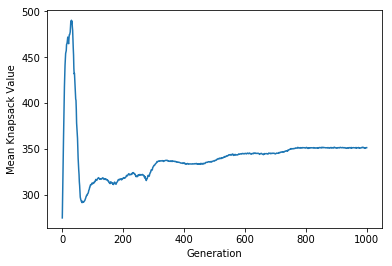

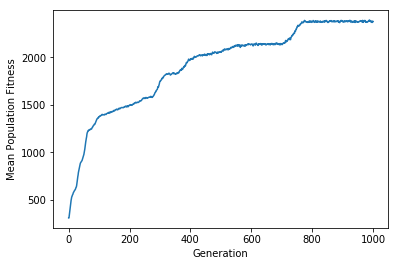

[765, 725, 581, 900]
360
44


In [143]:
pop_size = 1000
num_items = 1000
itemset = [Item(random.randint(10, 100), random.randint(10, 100)) for _ in range(num_items)]
max_weight = 300
max_time = 10
best = run_knapsack_ga(itemset, max_weight, max_time)
print(best)
print(get_genotype_value(best))
print(get_genotype_weight(best))

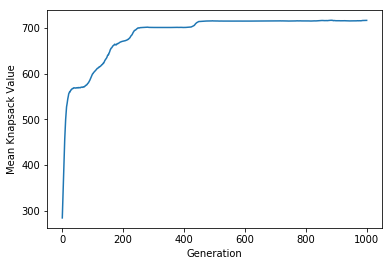

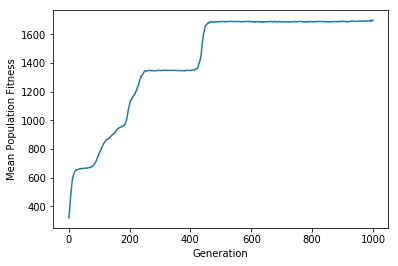

Best from random is [365, 40, 401, 780, 118, 79, 641, 574, 50] whose weight is 137, value is 773 and fitness is 1692.7007299270074


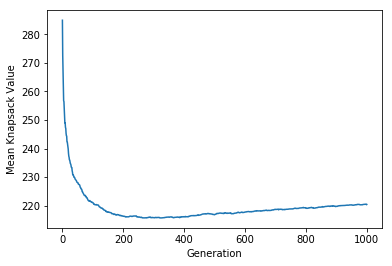

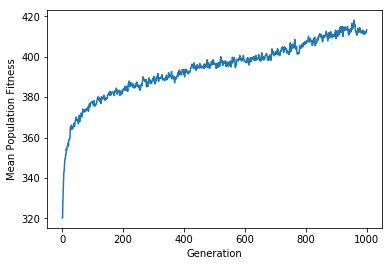

Best from recombination is [365, 40, 401, 780, 118, 79, 641, 574, 50] whose weight is 137, value is 773 and fitness is 1692.7007299270074


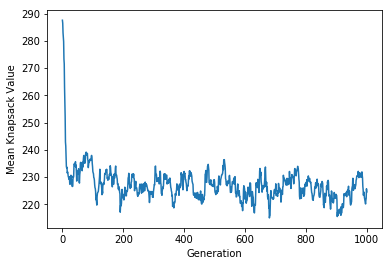

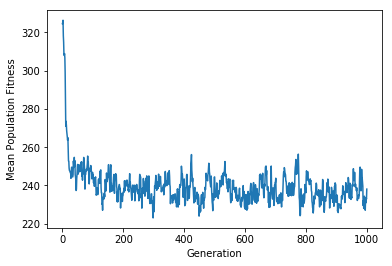

Best from better_recombination is [365, 40, 401, 780, 118, 79, 641, 574, 50] whose weight is 137, value is 773 and fitness is 1692.7007299270074


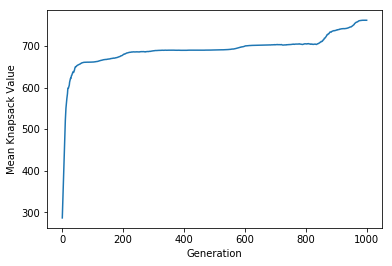

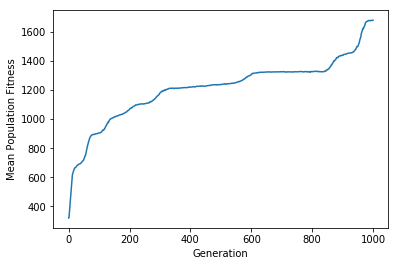

Best from proportional is [50, 40, 241, 19, 209, 800, 365, 287] whose weight is 198, value is 778 and fitness is 1178.7878787878788


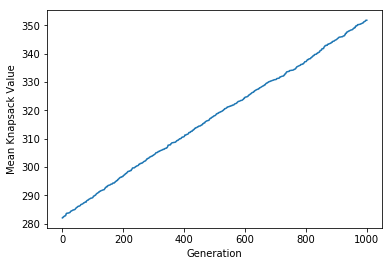

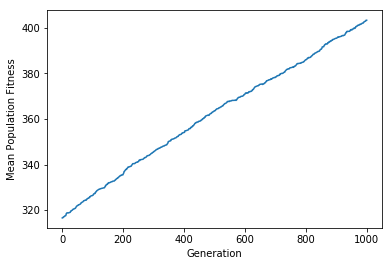

Best from tournament_selection is [50, 40, 241, 19, 209, 800, 365, 287] whose weight is 198, value is 778 and fitness is 1178.7878787878788


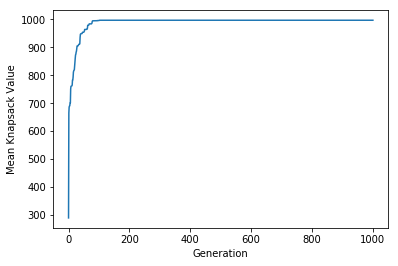

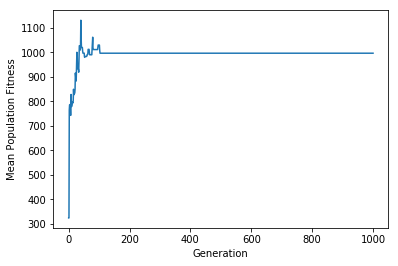

Best from rank_order_selection is [209, 914, 38, 873, 701, 163, 796, 340, 50, 365] whose weight is 300, value is 997 and fitness is 997.0


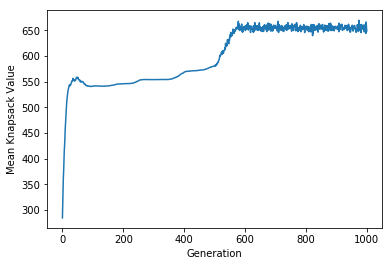

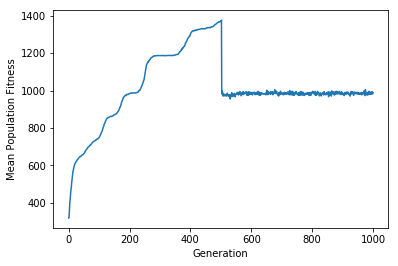

Best from elitism is [365, 163, 209, 56, 796, 914, 873, 50, 585, 38] whose weight is 298, value is 998 and fitness is 1004.6979865771813


In [284]:
def run_knapsack_ga(itemset, max_weight, max_time):
    import time
    import numpy as np
    
    start_time = time.time()
    best_so_far = None
    
    while(time.time() - start_time < max_time-0.1):
        from numpy import mean, log
        from matplotlib import pyplot
        import random
        random.seed(100)
        items = itemset
        def get_genotype_value(genotype):
            return sum([items[i].value for i in genotype])
        def get_genotype_weight(genotype):
            return sum([items[i].weight for i in genotype])
        
        def point_mutation(genotype):
            random_genotype_index = random.randint(0, len(genotype)-1)
            current_weight = get_genotype_weight(genotype)
            checked = 0
            while(True):
                random_item_index = random.randint(0, num_items-1)
                weight_with_random = current_weight + items[random_item_index].weight - items[random_genotype_index].weight
                if random_item_index not in genotype and weight_with_random <= max_weight:
                    genotype[random_genotype_index] = random_item_index
                    return genotype
                if checked > num_items:
                    return genotype
                
        def mutate_genotype(genotype, prob_mut=0.5, type_mutation = "better"):
            mutated_genotype = genotype[:]
            if random.random() < prob_mut:
                if type_mutation == "better":
                    point_mutation_better(mutated_genotype)
                else:
                    point_mutation(mutated_genotype)
            return mutated_genotype
        
        def point_mutation_better(genotype):
            current_weight = get_genotype_weight(genotype)
            current_value =  get_genotype_value(genotype)
            random_genotype_index = random.randint(0, len(genotype)-1)
            checked = 0
            while(True):
                random_item_index = random.randint(0, num_items-1)
                weight_with_random = current_weight + items[random_item_index].weight - items[genotype[random_genotype_index]].weight
                value_with_random = current_value + items[random_item_index].value - items[genotype[random_genotype_index]].value
                checked = checked+1
                if random_item_index not in genotype and weight_with_random <= max_weight and value_with_random > current_value:
                    genotype[random_genotype_index] = random_item_index
                    assert(get_genotype_value(genotype) > current_value)
                    return genotype
                if checked > num_items:
                    assert(get_genotype_value(genotype) >= current_value)
                    return genotype
                
        def get_genotype_fitness(genotype):
            if get_genotype_weight(genotype) > max_weight or (get_genotype_weight(genotype)) == 0:
                return 0
            else:
                return get_genotype_value(genotype)/(get_genotype_weight(genotype)/max_weight)
            
        def get_best_from_population(pop):
            values = [get_genotype_value(gene) for gene in pop]
            return values.index(max(values))
        
        def split_list(gene):
            in_half = int(len(gene)/2)
            return gene[:in_half], gene[in_half:]
        
        def add_list(list1, list2):
            current_weight = get_genotype_weight(list1)
            for item in list2:
                with_item = current_weight + items[item].weight
                if item not in list1 and with_item <= max_weight:
                    list1.append(item)
                    current_weight = with_item
            return list1
        
        def recombination(genotype1, genotype2):
            # Arrange them in increasing order to prevent conflicts. 
            genotype1.sort()
            genotype2.sort()
            genotype1part1, genotype1part2 = split_list(genotype1)
            genotype2part1, genotype2part2 = split_list(genotype2)
            genotype1 = add_list(genotype1part1, genotype2part2)
            genotype2 = add_list(genotype2part1, genotype1part2)
            return genotype1, genotype2
        
        def better_recombination(genotype1, genotype2):
            sorted(genotype1, key = lambda x:itemset[x].value)
            sorted(genotype2, key = lambda x:itemset[x].value)
            genotype1part1, genotype1part2 = split_list(genotype1)
            genotype2part1, genotype2part2 = split_list(genotype2)
            if (get_genotype_value(genotype1part2) > get_genotype_value(genotype2part2)):
                genotype1 = add_list(genotype1part2, genotype2part2)
            else:
                genotype1 = add_list(genotype2part2, genotype1part2)
            genotype2 = point_mutation(genotype1)
            return genotype1, genotype2
        
        def random_individual():
            total_weight = 0

            #This is a list of the indexes from the item list
            #the individual has in its knapsack
            org_genotype = []

            while(total_weight < max_weight):
                random_item_index = random.randint(0, num_items-1)

                #Make sure this item isn't already in our knapsack.
                if random_item_index not in org_genotype:

                    #But if this item would break our knapsack, 
                    #lets just go ahead and call this organism done.
                    if total_weight + items[random_item_index].weight > max_weight:
                        return org_genotype

                    #Otherwise we can add this item and keep going!
                    else:
                        org_genotype.append(random_item_index)
                        total_weight += items[random_item_index].weight

            return org_genotype
        
        def tournament_selection(population, k):
            items_match = random.sample(range(0, len(population)), k)
            to_reproduce = sorted(items_match, key = lambda x:get_genotype_value(population[x]))[-1]
            for item in items_match:
                population[item] = mutate_genotype(population[to_reproduce], 0.001)
            return population
        
        def rank_order_selection(population, factor):
            population = sorted(population, key = lambda x:get_genotype_value(x))
            scaled_fitness = [(factor**float(len(population)-g))*(factor-1)/(factor**float(len(population))-1) for g in range(len(population))]
            population = random.choices(population, k=pop_size, weights=scaled_fitness)
            return population

        def fitness_equalizer(population):
            return
        
        def knapsack(best_so_far, pop_size = 1000, num_generations = 1000, get_next_gen = "random"):
            pop_size = 1000
            num_generations = 1000

            population = [random_individual() for _ in range(pop_size)]
            pop_fitness = [get_genotype_fitness(g) for g in population]

            #keep track of mean fitness over time
            mean_fitnesses = [mean(pop_fitness)]

            #also keep track of the mean value of knapsacks overtime
            mean_value = mean([get_genotype_value(ind) for ind in population])
            mean_values = [mean_value]
            elites = []
            for generation in range(num_generations):
                pop_fitness = [get_genotype_fitness(g) for g in population]
                prev_pop = population[:]
                if get_next_gen is "random":
                    population = random.choices(population, k=pop_size, weights=pop_fitness)
                elif get_next_gen is "recombination":
                    i = random.randint(1, pop_size/2)
                    while(i):
                        i-=1
                        first, second = random.sample(range(0, len(population)-1), 2)
                        population[first], population[second] = recombination(population[first], population[second])
                elif get_next_gen is "better_recombination":
                    i = random.randint(1, pop_size/2)
                    while(i):
                        i-=1
                        first, second = random.sample(range(0, len(population)-1), 2)
                        population[first], population[second] = better_recombination(population[first], population[second])
                elif get_next_gen is "proportional":
                    population = random.choices(population, k=pop_size, weights=pop_fitness)
                elif get_next_gen is "tournament_selection":
                    population = tournament_selection(population, random.randint(1, 1+pop_size%3))
                elif get_next_gen is "rank_order_selection":
                    population = rank_order_selection(population, random.uniform(0.001, 1.0))
                elif get_next_gen is "elitism":
                    next_elite = population[get_best_from_population(population)]
                    if next_elite not in elites:
                        elites.append(next_elite)
                    if generation <= num_generations/2:
                        population = random.choices(population, k=pop_size, weights=pop_fitness)
                    else:
                        elites_fitness = [get_genotype_fitness(g) for g in elites]
                        population = random.choices(elites, k=pop_size, weights=elites_fitness)
                        population = [mutate_genotype(g, prob_mut = 0.1) for g in population]
                    
                if best_so_far:
                    best_so_far = max(best_so_far, population[get_best_from_population(population)], key = lambda x:get_genotype_value(x))
                else:
                    best_so_far = population[get_best_from_population(population)]
                    
                #record new mean population fitness and knapsack values
                population = [mutate_genotype(g, prob_mut = 0.001) for g in population]
                mean_fitnesses.append(mean(pop_fitness))
                mean_values.append(mean([get_genotype_value(ind) for ind in population]))

            #After evolving solutions, plot some figures
            pyplot.figure()
            pyplot.plot(mean_values)
            pyplot.xlabel("Generation")
            pyplot.ylabel("Mean Knapsack Value")
            pyplot.show()

            pyplot.figure()
            pyplot.plot(mean_fitnesses)
            pyplot.xlabel("Generation")
            pyplot.ylabel("Mean Population Fitness")
            pyplot.show()
            return best_so_far
        
        best_so_far = [0]
        types = ["random", "recombination", "better_recombination", "proportional", "tournament_selection", "rank_order_selection", "elitism"]
        for kind in types:
            best_so_far = max(knapsack(best_so_far, get_next_gen = kind), best_so_far, key = lambda x:get_genotype_value(x))
            print("Best from {0} is {1} whose weight is {2}, value is {3} and fitness is {4}".
                  format(kind,
                         best_so_far,
                         get_genotype_weight(best_so_far),
                         get_genotype_value(best_so_far),
                         get_genotype_fitness(best_so_far)))
        return best_so_far
best = run_knapsack_ga(itemset, max_weight, max_time)

In [256]:
pop_size = 1000
num_items = 1000
itemset = [Item(random.randint(10, 100), random.randint(10, 100)) for _ in range(num_items)]
max_weight = 300
max_time = 10

In [257]:
class Item:
    def __init__(self, weight, value):
        self.weight = weight
        self.value = value
        
    def __repr__(self):
        return "Item value: {0}, weight: {1}".format(self.value, self.weight)

In [283]:
pop_size = 1000
num_items = 1000
itemset = [Item(random.randint(10, 100), random.randint(10, 100)) for _ in range(num_items)]
max_weight = 300
max_time = 10

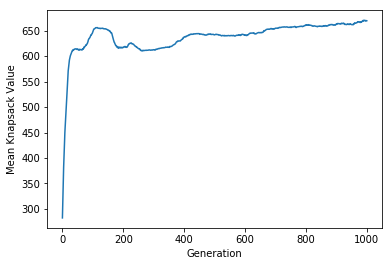

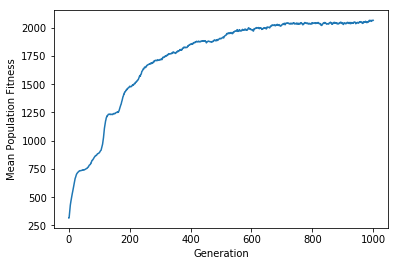

420


In [258]:
def get_genotype_value(genotype):
            return sum([itemset[i].value for i in genotype])
def get_genotype_weight(genotype):
            return sum([itemset[i].weight for i in genotype])

In [129]:
print(get_genotype_value(x))
print(get_genotype_weight(x))

TypeError: 'int' object is not iterable